# Amazon Top 50 Bestseller Books EDA
   
<ul>
      <li> What Is EDA ?</li>
    <li> Why It Is Important?</li>
 
</ul>
  

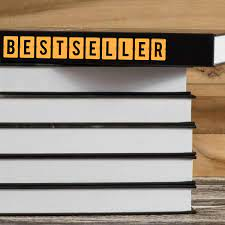

In [3]:
from IPython.display import Image
Image('1.jpg',)
#Image('2.jpg')

## What is EDA?

#### Exploratory Data Analysis (EDA) is a crucial step in data science that involves analyzing and summarizing datasets to uncover patterns, trends, and insights.Data visualization is a  key component of EDA, is the graphical representation of data using plots, charts, and graphs.
</span>

## Why EDA Important?

#### According to IBM exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions. 
</span>

### Introduction(UnderstandingThe Dataset)
<ul>
    <li> Brief About The Notebook </li>
    <li> Load all needed Libraries</li>
    <li> Reading The Dataset</li>
    <li> Description Of The Dataset</li>
    <li> Exploring The Dataset</li>
  
</ul>


#### Brief about the notebook

#### In this notebook,we will explore the dataset and try to clean the data such as remove outliers,handling duplications and missing data.Moreover,we will perform any necessary encoding or scaling for the data.Next,we will start conducting the three types of Analysis:Univariant,Bivariant and multivariant.The purpose of this Analysis is to unreveal all possible relationships between the variants(features) in the dataset.

#### Load all needed Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading The Dataset

In [5]:
#start reading the dataset
df=pd.read_csv('amazon_bestsellers.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


#### Description Of The Dataset


#### This dataset is talking about the  Top 50 bestseller books in the Period between(2009-2019) on Amazon website.
<ul>
    <li> It consists of 7 columns (Name of the book,Author,User Rating,Reviews,Price,Year,Genre). </li>
    <li>3 of them are numerical data ( Price,Year,User Rating ,Reviews).</li>
    <li> 2 of them are of string datatype and one column(Genre) is a categorical data.</li>
    
  
</ul>

#### Columns:
<ul>
    <li> Genre: In this dataset it was divided int fiction and non fiction only. </li>
    <li>Author : The Author's name.</li>
    <li>Name : The Book's name.</li>
    <li> Rating : It is of float datatype an it shows the average rating of the book out of 5 stars.</li>
    <li> Reviews : The number of reviews users had left for that book.
    <li>Price : The Price of each book.</li>
    <li>Year: The year of book publishing.</li>
  
</ul>



#### Exploring The Dataset

In [6]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
df.describe()#describe and comment

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [9]:
df.shape  #SHAPE

(550, 7)

### PREPROCESSING (Data Cleaning)
<ul>
    <li>Change data type of columns </li>
    <li>Missing values </li>
    <li>Duplications</li>
    <li>Outliers</li>
    <li>String Manupilation</li>
    <li>Encoding</li>
    <li>Scaling</li> 
    
</ul>



In [10]:
#df['Year'].value_counts().sort_index()

In [11]:
#detecting missing values + heatmap for it

In [12]:
df.isna().sum()  #There is no missing data

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

<AxesSubplot:>

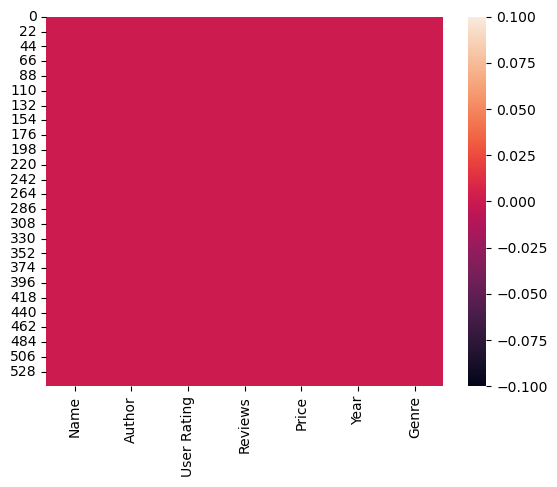

In [13]:
sns.heatmap(df.isna())  #heatmap shows that there is no missing data.

In [14]:
#Detecting Duplications

In [15]:
df[df.duplicated()]  #There is no Duplications

,Name,Author,User Rating,Reviews,Price,Year,Genre


In [16]:
#detecting outliers

In [17]:
#box plotfor outliers

<AxesSubplot:>

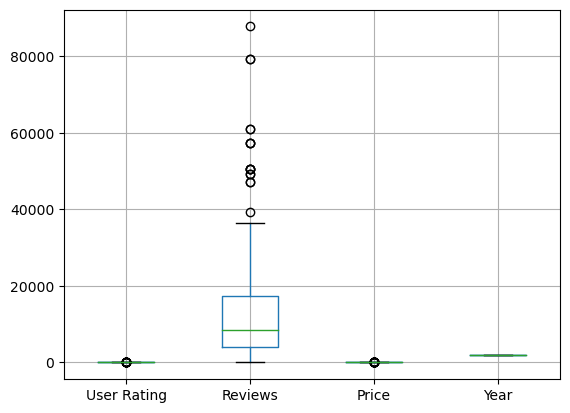

In [18]:
df.boxplot()

In [19]:
#dealing with outliers

In [20]:
#q1=df['Reviews'].quantile(0.25)


In [21]:
#q3=df['Reviews'].quantile(0.75)

In [22]:
#iqr=q3-q1

In [23]:
#min_out=q1-1.5*iqr

In [24]:
#min_out

In [25]:
#max_out=q3+1.5*iqr

In [26]:
#max_out

In [27]:
#df=df[(df['Reviews']>=min_out) & (df['Reviews']<=max_out)]

In [28]:
#df.boxplot()   #box plot for data set after removing outliers

In [29]:
#df.plot.scatter('Name','Reviews')
#plt.xticks(rotation=90)

In [30]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [31]:
#Data Encoding   

In [32]:
#from sklearn.preprocessing import LabelEncoder

In [33]:
#lb=LabelEncoder()

In [34]:
#lb.fit_transform(df[['Genre']])

In [35]:
#Data scaling

### Analayze Variables(features) and Relationship Between Them

<ul>
    <li>Univarient Analysis </li>
    <li>Bivarient Analysis</li>
    <li>Multivarient Analysis</li>
    
</ul>


   

Text(0, 0.5, 'Number of records')

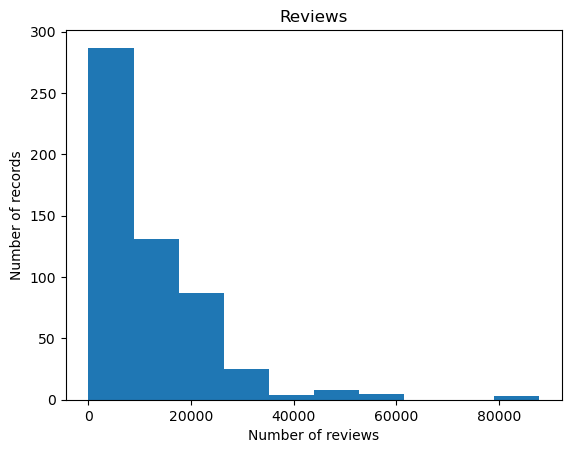

In [36]:
plt.hist(df['Reviews'])
plt.title('Reviews')
plt.xlabel('Number of reviews')
plt.ylabel('Number of records')

In [37]:
df['Reviews'].max()

87841

In [38]:
#sns.countplot(df['Reviews'])  this is for categorical data only

In [39]:
df['Reviews'].max()

87841

In [40]:
#df['Reviews'].nunique for categorical

In [41]:
df.loc[df['Reviews']==87841]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [42]:
df['Reviews'].idxmax()

534

In [43]:
df.iloc[df['Reviews'].idxmax()]


Name           Where the Crawdads Sing
Author                     Delia Owens
User Rating                        4.8
Reviews                          87841
Price                               15
Year                              2019
Genre                          Fiction
Name: 534, dtype: object

Text(0, 0.5, 'Number of User Rating')

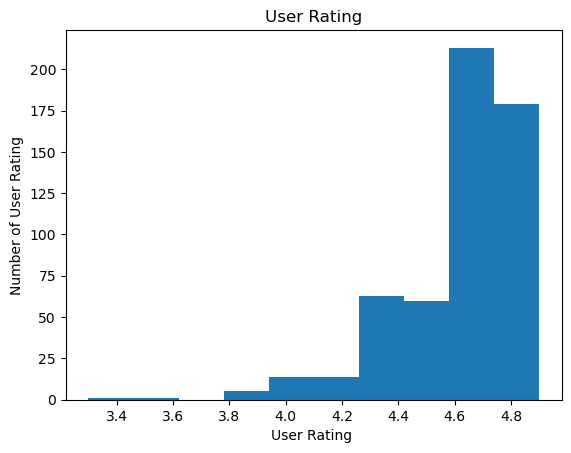

In [44]:
#USER Rating

plt.hist(df['User Rating'])
plt.title('User Rating')
plt.xlabel('User Rating ')
plt.ylabel('Number of User Rating')


In [45]:
df['User Rating'].value_counts().sort_values(ascending=False)

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: User Rating, dtype: int64

In [46]:
df_high_rating=df[df['User Rating']==4.8]
df_high_rating

,Name,Author,User Rating,Reviews,Price,Year,Genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
19,Alexander Hamilton,Ron Chernow,4.8,9198,13,2016,Non Fiction
30,Barefoot Contessa Foolproof: Recipes You Can T...,Ina Garten,4.8,1296,24,2012,Non Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
...,...,...,...,...,...,...,...
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction


In [47]:
df_high_rating['Name'].head(10)

4     5,000 Awesome Facts (About Everything!) (Natio...
19                                   Alexander Hamilton
30    Barefoot Contessa Foolproof: Recipes You Can T...
32                                             Becoming
33                                             Becoming
34    Being Mortal: Medicine and What Matters in the...
42           Cabin Fever (Diary of a Wimpy Kid, Book 6)
44    Can't Hurt Me: Master Your Mind and Defy the Odds
54    Creative Haven Creative Cats Coloring Book (Ad...
55    Creative Haven Owls Coloring Book (Adult Color...
Name: Name, dtype: object

In [48]:
df_Genre_count=df['Genre'].value_counts()
df_Genre_count

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

<AxesSubplot:>

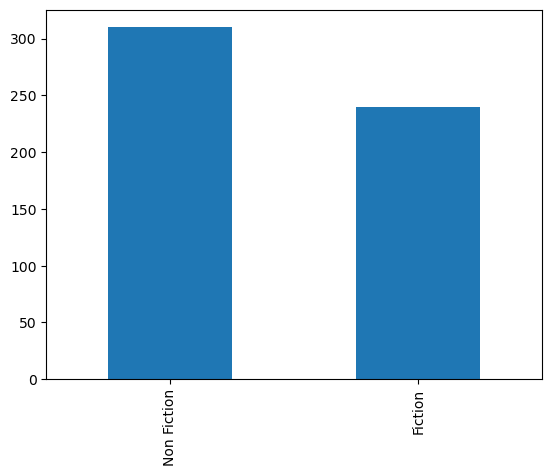

In [49]:
df_Genre_count.plot(kind='bar')

In [50]:
#Bivariant


<AxesSubplot:xlabel='Year', ylabel='Price'>

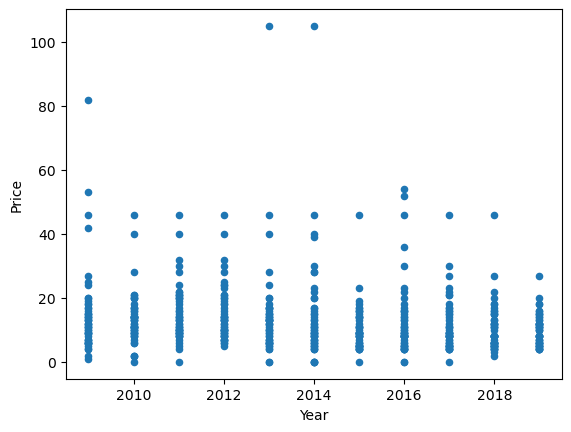

In [51]:
df.plot.scatter('Year','Price')

<AxesSubplot:xlabel='User Rating', ylabel='Price'>

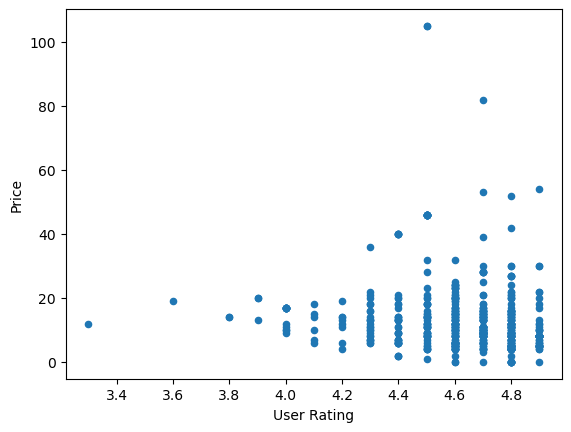

In [52]:
df.plot.scatter('User Rating','Price')

<AxesSubplot:xlabel='Genre', ylabel='User Rating'>

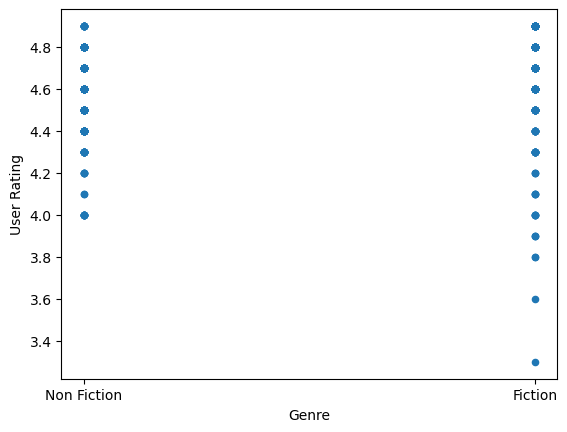

In [53]:
df.plot.scatter('Genre','User Rating')

### Questions&Answers
   
   <ul>
    <li>TOP 10 BESTSELLER BOOKS</li>
    <li>TOP 10 BESTSELLER BOOKS'AUTHORS</li>
    <li>PRICES OVER YEARS</li>
    <li>FICTION OR NONFICTION IN TOP10</li>
    <li>HIGHEST YEAR IN  SELLING</li>
    <li>Top 10 Books in Reviews/li> 
    
</ul>




In [54]:
#dd=[df['Genre']=='Non Fiction']['Year'].value_counts()


In [55]:
df


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [56]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


## Author

### Univariant Analysis

In [57]:
df['Author']

0                      JJ Smith
1                  Stephen King
2            Jordan B. Peterson
3                 George Orwell
4      National Geographic Kids
                 ...           
545                 Jeff Kinney
546                 Jen Sincero
547                 Jen Sincero
548                 Jen Sincero
549                 Jen Sincero
Name: Author, Length: 550, dtype: object

####  Top 10 best selling Author from (2009-2019)

In [62]:
df['Author'].value_counts().head(10)

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Stephenie Meyer                        7
Name: Author, dtype: int64

<AxesSubplot:>

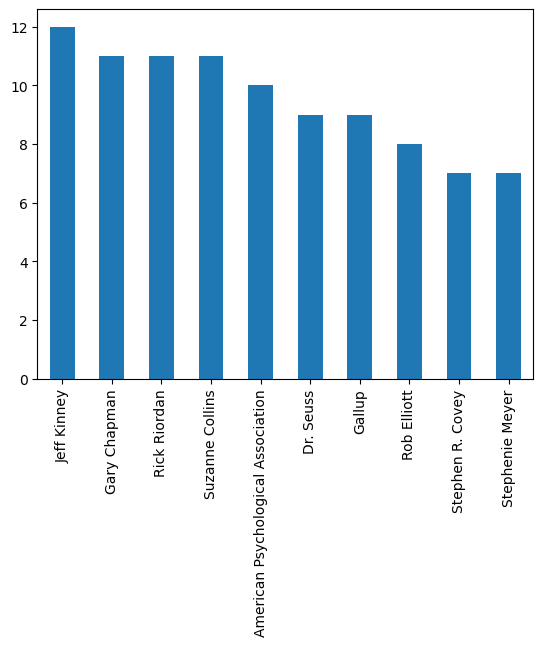

In [65]:
df['Author'].value_counts().head(10).plot(kind='bar')

#### How many Authors do we have as  a bestseller from (2009-2019)?

In [60]:
df['Author'].nunique()

248

#### Listing all bestseller Authors from (2009-2019)

In [61]:
df['Author'].unique()

array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'Brené Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American Psych

### Bivariant Analysis

In [64]:
df.sample(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
385,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,7747,14,2011,Fiction
361,The Day the Crayons Quit,Drew Daywalt,4.8,8922,9,2014,Fiction


#### What is the Author's name that has the highest /Least Rating?

In [70]:
df.groupby('Author')['User Rating'].max().sort_values(ascending =False).head()


Author
Jeff Kinney       4.9
Dr. Seuss         4.9
J. K. Rowling     4.9
J.K. Rowling      4.9
Patrick Thorpe    4.9
Name: User Rating, dtype: float64

In [73]:
df.groupby('Author')['User Rating'].min().sort_values().head()

Author
J.K. Rowling     3.3
Harper Lee       3.6
E L James        3.8
Donna Tartt      3.9
Veronica Roth    3.9
Name: User Rating, dtype: float64

#### who is the Author with the highest/least reviews?

In [76]:
df.groupby('Author')['Reviews'].max().sort_values(ascending=False).head()

Author
Delia Owens       87841
Paula Hawkins     79446
Michelle Obama    61133
Gillian Flynn     57271
John Green        50482
Name: Reviews, dtype: int64

In [77]:
df.groupby('Author')['Reviews'].min().sort_values().head()

Author
Zhi Gang Sha          37
Peter A. Lillback    408
Edward M. Kennedy    438
Jon Stewart          440
Larry Schweikart     460
Name: Reviews, dtype: int64

#### Who is the Author of the highest/Least book Price?

In [79]:
df.groupby('Author')['Price'].max().sort_values(ascending=False).head()

Author
American Psychiatric Association    105
Stephenie Meyer                      82
Lin-Manuel Miranda                   54
Bill Simmons                         53
J. K. Rowling                        52
Name: Price, dtype: int64

In [80]:
df.groupby('Author')['Price'].min().sort_values().head()  #misleading 

Author
Harper Lee                          0
Delegates of the Constitutional
    0
Stephenie Meyer                     0
Jeff Kinney                         0
Alice Schertle                      0
Name: Price, dtype: int64

#### who are the top 5 authors for Fiction/NonFiction books?

In [82]:
df.groupby(['Genre','Author']).count()
            

Name  User Rating  Reviews  Price  Year
Genre       Author                                                   
Fiction     Abraham Verghese     2            2        2      2     2
            Adam Mansbach        1            1        1      1     1
            Adir Levy            1            1        1      1     1
            Alan Moore           1            1        1      1     1
            Alex Michaelides     1            1        1      1     1
...                            ...          ...      ...    ...   ...
Non Fiction Tucker Carlson       1            1        1      1     1
            W. Cleon Skousen     1            1        1      1     1
            Walter Isaacson      3            3        3      3     3
            William Davis        2            2        2      2     2
            Zhi Gang Sha         2            2        2      2     2

[250 rows x 5 columns]

In [1]:
df.groupby(['Genre','Author']).get_group()

NameError: name 'df' is not defined

## Multivariant Analysis

In [86]:
df.sample(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
178,If Animals Kissed Good Night,Ann Whitford Paul,4.8,16643,4,2017,Fiction
66,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2018,Fiction
